# <font color='blue'>California Housing</font>
- https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Missing Values

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df[df.total_bedrooms.isnull()].ocean_proximity.value_counts()

<1H OCEAN     102
INLAND         55
NEAR OCEAN     30
NEAR BAY       20
Name: ocean_proximity, dtype: int64

In [7]:
df.groupby('ocean_proximity')['total_bedrooms'].median()

ocean_proximity
<1H OCEAN     438.0
INLAND        423.0
ISLAND        512.0
NEAR BAY      423.0
NEAR OCEAN    464.0
Name: total_bedrooms, dtype: float64

In [8]:
# replacing the missing values with the median according to proximity to the ocean

df.loc[(df.total_bedrooms.isnull()) & (df.ocean_proximity == '<1H OCEAN'), 'total_bedrooms'] = df.loc[df.ocean_proximity == '<1H OCEAN', 'total_bedrooms'].median()
df.loc[(df.total_bedrooms.isnull()) & (df.ocean_proximity == 'INLAND'), 'total_bedrooms'] = df.loc[df.ocean_proximity == 'INLAND', 'total_bedrooms'].median()
df.loc[(df.total_bedrooms.isnull()) & (df.ocean_proximity == 'NEAR OCEAN'), 'total_bedrooms'] = df.loc[df.ocean_proximity == 'NEAR OCEAN', 'total_bedrooms'].median()
df.loc[(df.total_bedrooms.isnull()) & (df.ocean_proximity == 'NEAR BAY'), 'total_bedrooms'] = df.loc[df.ocean_proximity == 'NEAR BAY', 'total_bedrooms'].median()

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
# splitting the data of 'ocean_proximity' column with get_dummies

df = pd.get_dummies(df, columns=['ocean_proximity'])

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


# Data Visualization

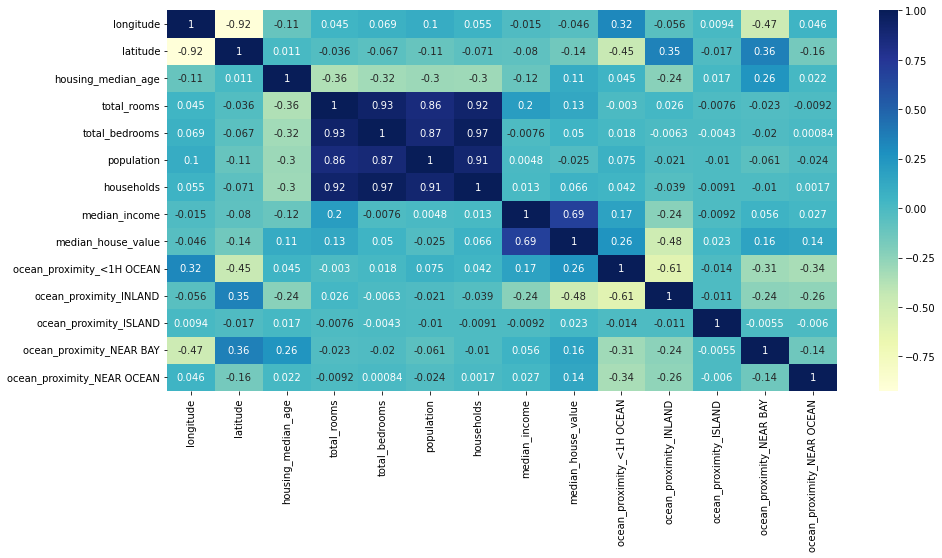

In [12]:
# checking the correlation into the features

plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

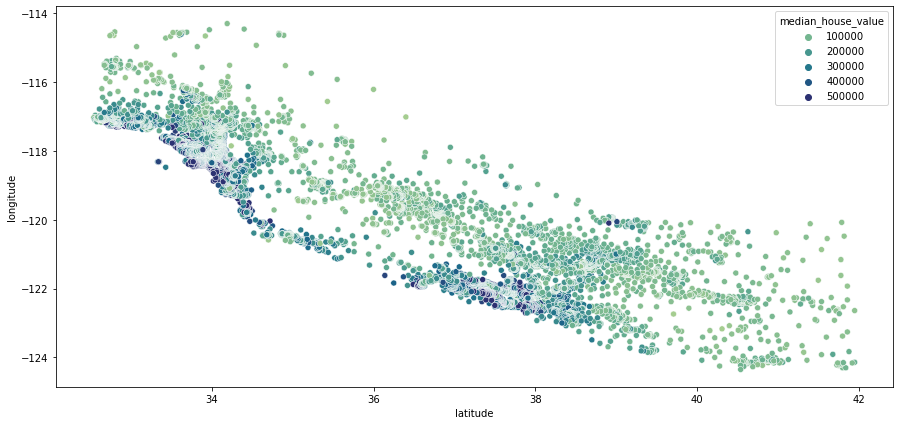

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.scatterplot(data=df, x='latitude', y='longitude', hue='median_house_value', ax=ax, palette='crest')

plt.show()

- Homes closer to the ocean are generally more expensive.

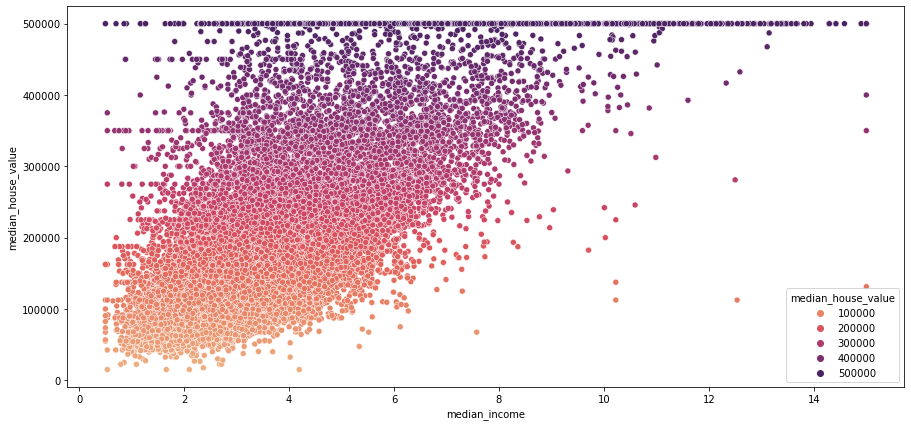

In [30]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.scatterplot(data=df, x='median_income', y='median_house_value', hue='median_house_value', ax=ax, palette='flare')

plt.show()

- Proving the high correlation between 'median_house_value' and 'median_income'

# Train_test_split

In [31]:
X = df.drop('median_house_value', axis=1)
y = df.median_house_value

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [33]:
df.shape, X_train.shape, X_test.shape

((20640, 14), (16512, 13), (4128, 13))

# Regression Models

In [36]:
# using a 'for loop' to loop through all models

for model in [LinearRegression, RandomForestRegressor, DecisionTreeRegressor]:
    reg = model().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(model.__name__)
    print(f'(R²): {metrics.r2_score(y_test, y_pred)}')
    print(f'(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
    print(f'(MSE): {metrics.mean_squared_error(y_test, y_pred)}', end='\n\n')

LinearRegression
(R²): 0.6255248834479661
(MAE): 50662.84336020485
(MSE): 4907155548.575926

RandomForestRegressor
(R²): 0.8163522858704163
(MAE): 31738.652272286818
(MSE): 2406536134.2882457

DecisionTreeRegressor
(R²): 0.6363575225168662
(MAE): 43644.90600775194
(MSE): 4765203673.636628



# GridSeachCV

- The model that performed best was RandomForest
- We can inprove that model with ``GridSearchCV``

In [41]:
# params to inprove the RandomForest

params = {
    'n_estimators': [100, 200, 250]
}

In [42]:
grid = GridSearchCV(RandomForestRegressor(), param_grid=params, scoring='r2')

In [43]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='r2')

In [44]:
grid.best_estimator_

RandomForestRegressor(n_estimators=200)

In [45]:
reg = grid.best_estimator_

In [46]:
y_pred = reg.predict(X_test)

In [48]:
print(f'(R²): {metrics.r2_score(y_test, y_pred)}')
print(f'(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'(MSE): {metrics.mean_squared_error(y_test, y_pred)}')

(R²): 0.8189113274935003
(MAE): 31395.848741521317
(MSE): 2373002223.1024323
